In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-eda/data.csv


## Google App Store EDA 

# About Dataset

 # Description 
   The Data Set was downloaded from Kaggle, from the following link

1- Context: 
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

2- Content: 
Each app (row) has values for catergory, rating, size, and more.

3- Acknowledgements: 
This information is scraped from the Google Play Store. This app information would not be available without it.

4- Inspiration:  The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading and Cleaning

- Load the csv file with the pandas

- creating the dataframe and understanding the data present in the dataset using pandas

- Dealing with the missing data, outliers and the incorrect records

- Load Csv File

In [3]:
df = pd.read_csv('/kaggle/input/google-play-store-eda/data.csv')

- Look on top (5) rows of the data

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


_ Remove Unnamed Columns 

In [5]:
df.drop(columns=['Unnamed: 13'], inplace=True)

In [6]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Note: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

- Important Things 

In [7]:
# Set option to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Hide warnings
import warnings 
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [8]:
print(f"The name of co;umns in this datset are following: {df.columns}")

The name of co;umns in this datset are following: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [9]:
print(f"The Numbers of Rows are {df.shape[0]}, and Columns are {df.shape[1]}.")

The Numbers of Rows are 10841, and Columns are 13.


- Let's have a look on the shape of the dataset

In [10]:
df.shape

(10841, 13)

- Not enough, let's have a look on the columns and their data types using detailed info function

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Observation:
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
  - 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',   'Price', 'Content Rating',     'Genres', 'Last Updated', 'Current Ver',   'Android Ver'
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
  - 'Size', 'Installs', 'Price'

In [12]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# Observation:
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that 'Size', 'Installs', 'Price' are also numeric, we must convert them to numeric data type in data wrangling process

- Let's clean the Size column

In [13]:
# check for null values
df['Size'].isnull().sum()

0

- No null values, we are good to go

In [14]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- There are several uniques values in the Size column, we have to first make the unit into one common unit from M and K to bytes, and then remove the M and K from the values and convert them into numeric data type.

In [15]:
# find the values having M in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [16]:
# find the values having k in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [17]:
# find the values having Varies with device in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

- We have 8830 values in M units
- We have 316 values in k units
- We have 1695 value in Varies with device

- Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

- Check the legth of rows 

In [18]:
len(df)

10841

# Convert the size column to numeric 
by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it

In [19]:
# let's define a function

def convert_size(Size):
    if isinstance(Size,str):
        if 'k' in Size:
            return float(Size.replace('k', "")) * 1024
        elif 'M' in Size:
            return float(Size.replace('M', "")) * 1024 * 1024
        elif 'Varies with device' in Size:
            return np.nan
    return Size 

In [20]:
df['Size'] = df['Size'].apply(convert_size)

In [21]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [22]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

 - Now we have converted every value into bytes and removed the M and K from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

# Let's take care of Installs Column

In [23]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [25]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

In [26]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10841

- The only problem I see here is the + sign in the values, let's remove them and convert the column - into numeric data type.
- The total values in the Installs column are 10841 and there are no null values in the column.

- However, one value 0 has no plus sign

- Let's remove the plus sign + and , from the values and convert them into numeric data type

In [27]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changes and the + and , sign has been removed

In [28]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [29]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [30]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [31]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [32]:
df['Installs_category'].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

# Now let see the Price Column 

In [33]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
df['Price'].isnull().sum()

0

- No Missing Values

In [35]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

- We need to confirm if the values in the Price column are only with $ sign or not

In [36]:
# Let's see how many values have ($) sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [37]:
# the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

- Now we can confirm that the only currency used is $ in the Price column or 0 value, as 800+10041=10841 Total values

- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [38]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [39]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [40]:
# Using f string print min, max and average price of app
print(f"Min price is {df['Price'].min()}")
print(f"Max price is {df['Price'].max()}")
print(f"Average price is {df['Price'].mean()}")

Min price is 0.0
Max price is 400.0
Average price is 1.0272733142699015


## 2.1 Descriptive Statistics

In [41]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observaion:
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

## 2.2. Dealing with the missing values

Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

- Let's have a look on the missing values in the dataset

In [42]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [43]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [44]:
df.isnull().sum().sum()

4877

In [45]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

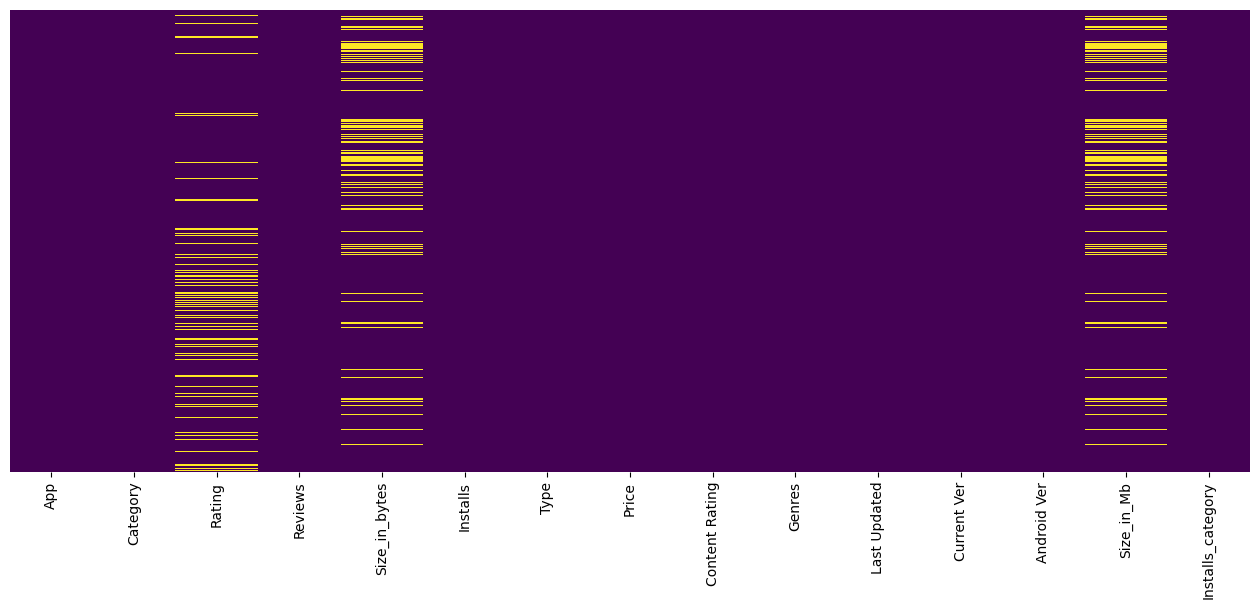

In [46]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

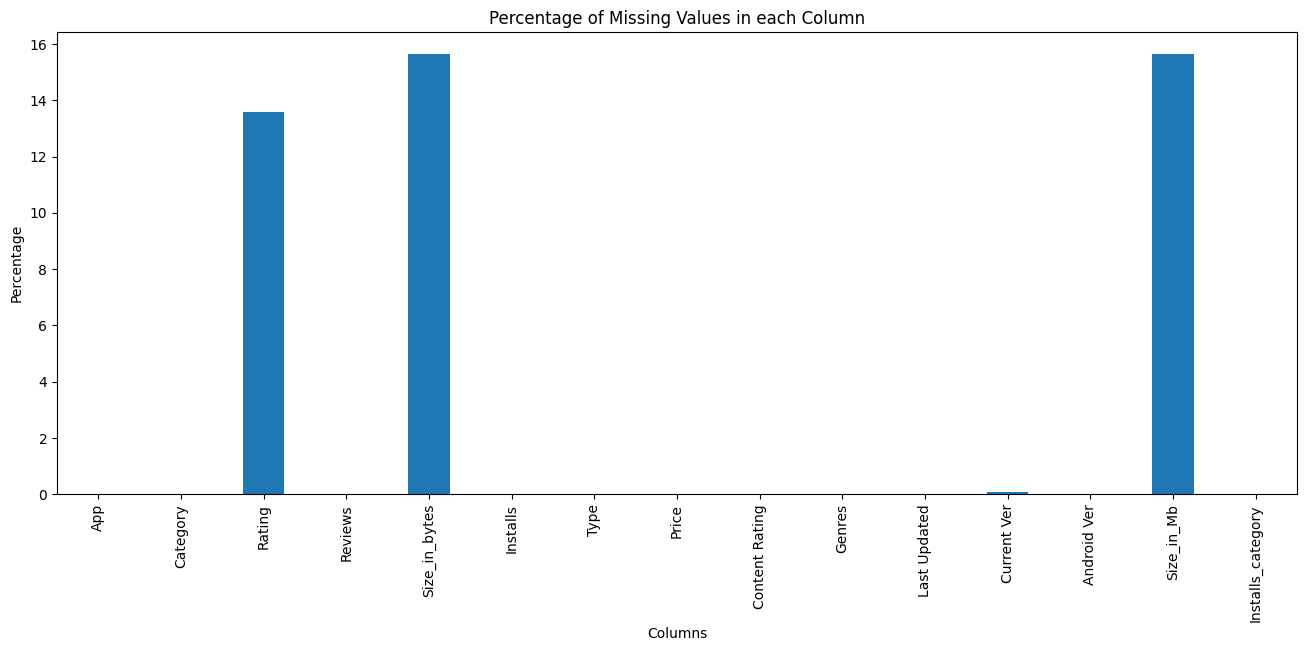

In [47]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

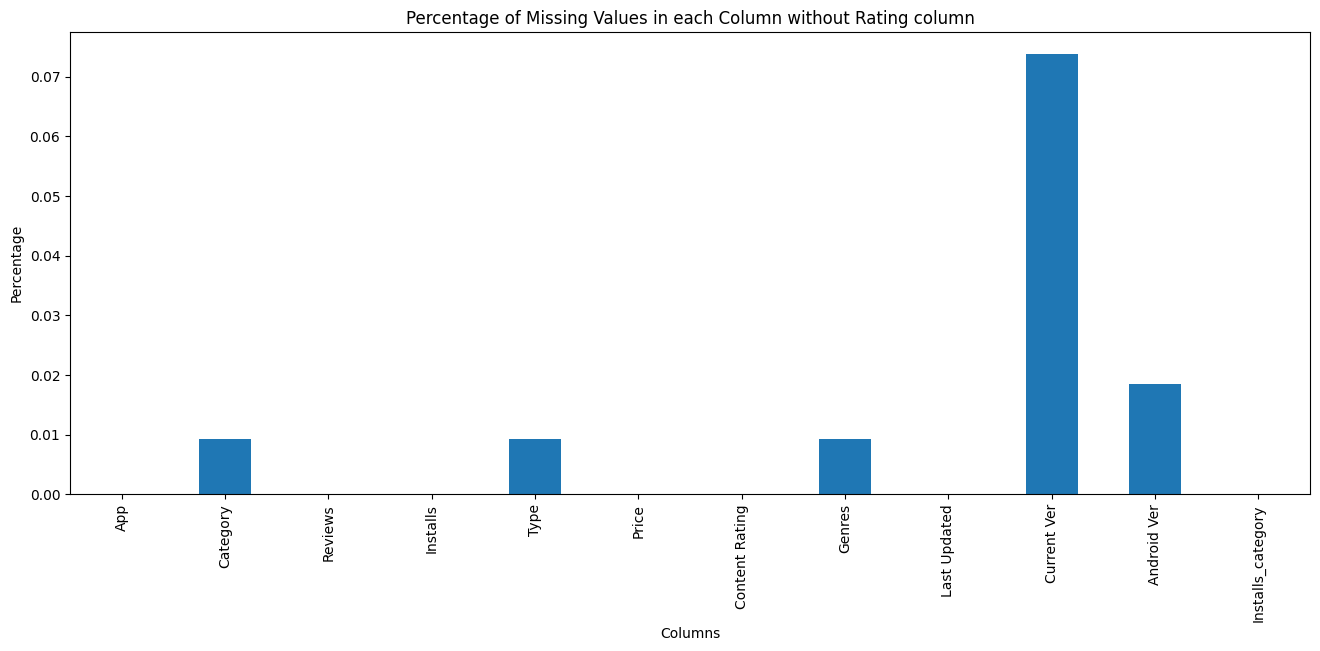

In [48]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')

## Observation:
- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.

# 2.3. Dealing with the missing values

- We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

- Let's run the correlations

In [49]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

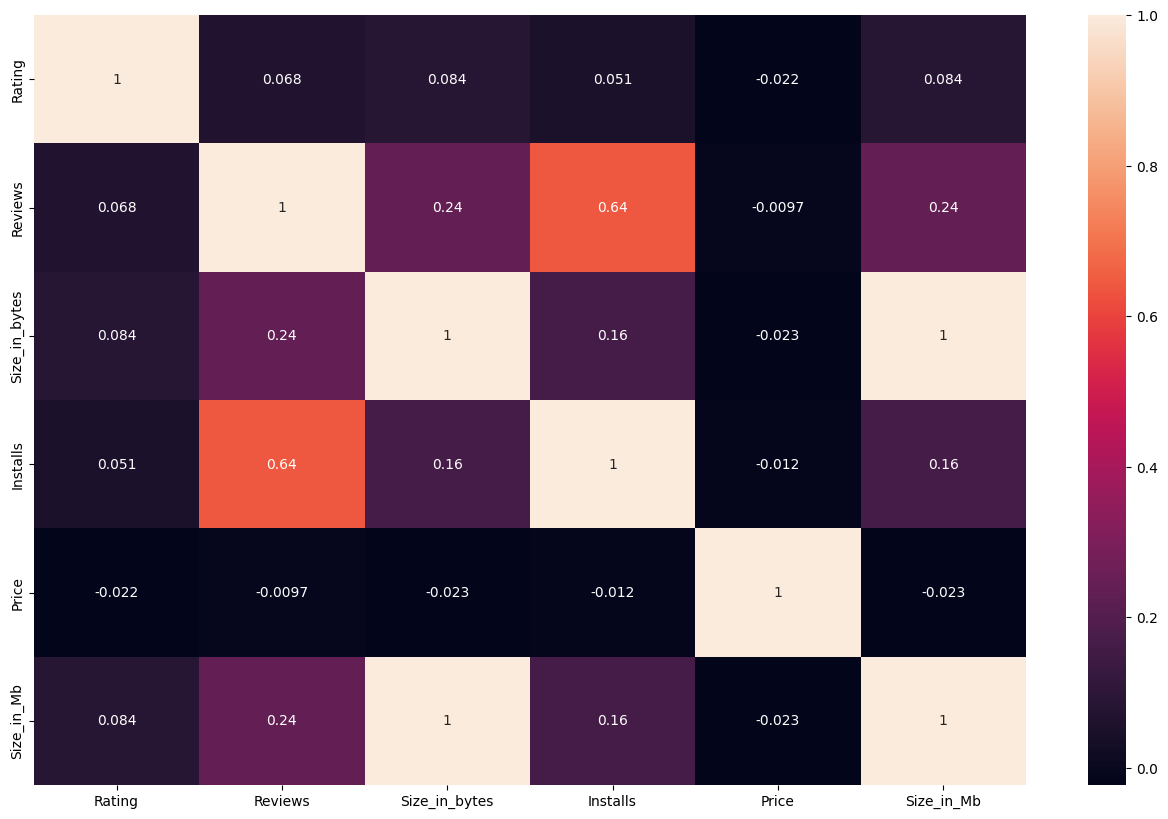

In [50]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [51]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [52]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


## Observation:
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the Reviews column has a high correlation with the Installs column, which is 0.64 according to corr(). Which is quite good.
     - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
     - If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
- Installs is slightly correlated with Size_in_Mb or Size_in_bytes , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.